# Pandas Processing

In [1]:
import time
import numpy as np 
import pandas as pd
import os

In [2]:
#Fake Data creation: Dataframe with two columns (A,B) of lenght N. 
np.random.seed(0)
N = 1_000_000

A_list = np.random.randint(1, 100, N)
B_list = np.random.randint(1, 100, N)
df = pd.DataFrame({'A': A_list, 'B': B_list})

In [3]:
df

,A,B
0,45,90
1,48,91
2,65,70
3,68,91
4,68,87
...,...,...
999995,70,87
999996,41,36
999997,93,99
999998,62,3


In [4]:
#For the purpose of this demonstration, we will be utilizing a function divide()
#In your project, this could be anything from artihmatic to string manipulation
def divide(a, b):
    if b == 0:
        return 0.0
    return float(a)/b

### Applying our Function
On this portion of the notebook, we will cover some common ways to apply a custom function to a dataframe. We will also be saving the time it takes for each implementation to execute and compare. 

In [5]:
#The first method we will use will be to loop and apply our function to the designated rows. 

start = time.time() #Begins a timer 
temp = []
for _, row in df[['A', 'B']].iterrows():
    temp.append(divide(row['A'], row['B']))
df['C'] = temp

looping = time.time() - start #Ends the timer-> Will be named differently for every method

In [6]:
looping

11.083172082901001

In [7]:
#We can rewrite our loop as a list comperhension and assign directly to a column instead.
#This is a cleaner way to loop, but how much faster is it ? 
start = time.time()

df['C']= [divide(row['A'], row['B']) for _, row in df[['A', 'B']].iterrows()]

list_comp = time.time() - start

In [8]:
looping , list_comp

(11.083172082901001, 10.7375807762146)

In [9]:
#Apply Lamda is a very popular method for working with dataframes. 
#Since it is popular and often recommended, how much faster is it than looping ?
start = time.time()

df['C']= df.apply(lambda row: divide(row['A'], row['B']), axis=1)  

apply = time.time() - start

In [10]:
apply

2.62471079826355

In [11]:
looping/apply #In this case, about x4 faster to execute

4.22262600901912

Official Documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html

In [12]:
#We have seen before that looping is not the fastest in these application
#But if we introduce additional properties to iterate, it can make a dramatic difference
start = time.time()

df['C']= [divide(a, b) for a, b in df[['A', 'B']].itertuples(index=False)]  

list_comp_itertuples = time.time() - start

In [13]:
list_comp_itertuples

0.29758501052856445

In [14]:
looping/list_comp_itertuples #Yes an x34 improvement in this case 

37.24371756230361

In [15]:
#Now that we have seen the wonders a built in function can create, lets use the built in zip method 

start = time.time()

df['C']= [divide(a, b) for a, b in zip(df['A'], df['B'])] 

list_comp_zip = time.time() - start

In [16]:
list_comp_zip #Not bad this is a small improvement on itertuples with a little less synthax 

0.1780991554260254

In [17]:
#Other built in methods in python are:
#list - commonly used for data structer casting 
#map - map(function, iterables): Executes a specified function for each item in an iterable.
#                                The item is sent to the function as a parameter.
start = time.time()
df['C']= list(map(divide, df['A'], df['B'])) 
mapping = time.time() - start

In [18]:
mapping #comparable speed with less synthax 

0.16810083389282227

In [19]:
#Lastly we encounter Numpy some functions
#The first being vectorize, but how much faster could this be ?
start = time.time()
df['C']= np.vectorize(divide)(df['A'], df['B']) 
vecotorizing = time.time() - start

In [20]:
vecotorizing # Well definitely an improvement and this is probably one of the best 
             # ways to apply a custom function, if your data allows it. 
             # However, I am sure there are alternative ways/cirucumstances you could use other strategies 

0.09783291816711426

In [21]:
# A small example of an alternative strategy is by using Numpy's where function
# This function takes a conditional argument
start = time.time()
df['C']= np.where(df['B'] == 0, 0, df['A'] / df['B'])
numpy_cond = time.time() - start

In [22]:
numpy_cond #And well this is about x3 times quicker than vectorizing
           #Be aware not every function could be re-written in this manner (np.where)
           #This was just an exmaple of an alternative method to the common ones I displayed.

0.0036690235137939453

### Graphing Results 

In [23]:
recorded_time = [looping,
                 list_comp,
                 apply,
                 list_comp_itertuples,
                 list_comp_zip,
                 mapping,
                 vecotorizing,
                 numpy_cond]

In [24]:
methods = ['Looping',
           'List Comprehension',
           'Apply Lambda',
           'List Comprehension Itertuples',
           'List Comprehension Ziped',
           'Mapping',
           'Numpy Vecotorizing',
           'Numpy Where']

<AxesSubplot: title={'center': 'Method Run Time Comparision'}, xlabel='method'>

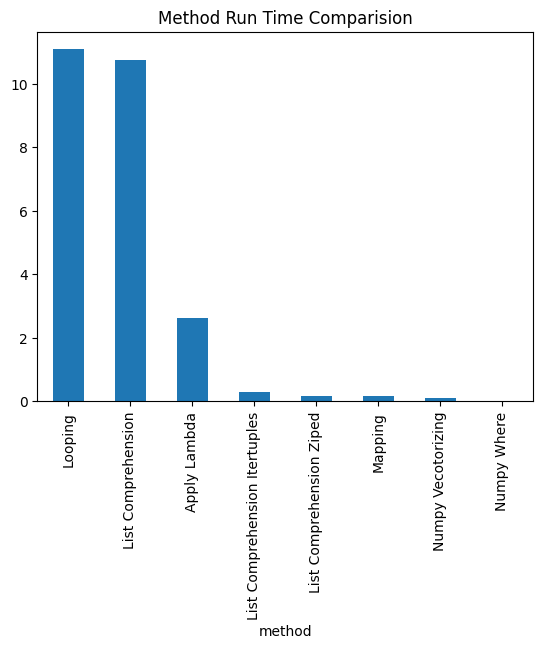

In [25]:
data = [[x,y] for x,y in zip(methods,recorded_time)]
pd.DataFrame(data,
    columns=['method','run time']
            ).set_index('method')['run time'].plot(
                kind='bar',
                title='Method Run Time Comparision')

# File Formats 

In [26]:
#Fake Data 

#Creates fake data, returns a pandas dataframe 
def get_dataset(size):
    df = pd.DataFrame()
    df['size'] = np.random.choice(['big','medium','small'], size)
    df['age'] = np.random.randint(1, 50, size)
    df['team'] = np.random.choice(['red','blue','yellow','green'], size)
    df['win'] = np.random.choice(['yes','no'], size)
    dates = pd.date_range('2020-01-01', '2022-12-31')
    df['date'] = np.random.choice(dates, size)
    df['prob'] = np.random.uniform(0, 1, size)
    return df

#Sets types in a dataframe 
def set_dtypes(df):
    df['size'] = df['size'].astype('category')
    df['team'] = df['team'].astype('category')
    df['age'] = df['age'].astype('int16')
    df['win'] = df['win'].map({'yes':True, 'no': False})
    df['date'] = df['date'].astype('datetime64')
    df['prob'] = df['prob'].astype('float32')
    return df

In [27]:
df = get_dataset(1_000_000)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   size    1000000 non-null  object        
 1   age     1000000 non-null  int64         
 2   team    1000000 non-null  object        
 3   win     1000000 non-null  object        
 4   date    1000000 non-null  datetime64[ns]
 5   prob    1000000 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 45.8+ MB


In [28]:
df

,size,age,team,win,date,prob
0,small,3,yellow,yes,2022-08-03,0.181119
1,small,19,blue,no,2020-03-11,0.730545
2,big,34,red,yes,2021-05-15,0.411991
3,big,43,yellow,no,2021-07-20,0.689724
4,small,42,blue,no,2021-11-15,0.300918
...,...,...,...,...,...,...
999995,big,19,yellow,yes,2022-03-28,0.930575
999996,small,13,blue,no,2022-08-31,0.979567
999997,big,42,yellow,no,2021-02-11,0.065674
999998,big,18,blue,yes,2020-05-18,0.470764


### CSV Files

In [29]:
start = time.time()
df.to_csv('test.csv', index=False)
csv_write = time.time() - start

In [30]:
start = time.time()

df_csv = pd.read_csv('test.csv')

### NOTE: Pandas Dtypes can change when being loaded.
### In this example date was changed from datetime to object when being loaded back in
### To avoid Dtype errors, create a function to set the Dtypes of your data
df_csv = set_dtypes(pd.read_csv('test.csv'))

csv_read = time.time() - start
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   size    1000000 non-null  category      
 1   age     1000000 non-null  int16         
 2   team    1000000 non-null  category      
 3   win     1000000 non-null  bool          
 4   date    1000000 non-null  datetime64[ns]
 5   prob    1000000 non-null  float32       
dtypes: bool(1), category(2), datetime64[ns](1), float32(1), int16(1)
memory usage: 16.2 MB


### Pickle Files

In [31]:
start = time.time()
df.to_pickle('test.pickle')
pickle_write = time.time() - start

start = time.time()
df_pickle = pd.read_pickle('test.pickle')
pickle_read = time.time() - start

df_pickle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   size    1000000 non-null  object        
 1   age     1000000 non-null  int64         
 2   team    1000000 non-null  object        
 3   win     1000000 non-null  object        
 4   date    1000000 non-null  datetime64[ns]
 5   prob    1000000 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 45.8+ MB


### Parquet Files

In [32]:
start = time.time()
df.to_parquet('test.parquet')
parquet_write = time.time() - start

start = time.time()
df_parquet = pd.read_parquet('test.parquet')
parquet_read = time.time() - start

df_parquet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   size    1000000 non-null  object        
 1   age     1000000 non-null  int64         
 2   team    1000000 non-null  object        
 3   win     1000000 non-null  object        
 4   date    1000000 non-null  datetime64[ns]
 5   prob    1000000 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 45.8+ MB


### Feather Files

In [33]:
start = time.time()
df.to_feather('test.feather')
feather_write = time.time() - start

start = time.time()
df_feather = pd.read_feather('test.feather')
feather_read = time.time() - start

df_feather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   size    1000000 non-null  object        
 1   age     1000000 non-null  int64         
 2   team    1000000 non-null  object        
 3   win     1000000 non-null  object        
 4   date    1000000 non-null  datetime64[ns]
 5   prob    1000000 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 45.8+ MB


### File Comparisons

In [34]:
!ls -Gflash test.csv test.pickle test.parquet test.feather

94224 -rw-r--r--  1 alexcastel  staff    46M Jan 26 21:48 test.csv
87264 -rw-r--r--  1 alexcastel  staff    43M Jan 26 21:48 test.pickle
22936 -rw-r--r--  1 alexcastel  staff    11M Jan 26 21:48 test.parquet
59688 -rw-r--r--  1 alexcastel  staff    29M Jan 26 21:48 test.feather


In [35]:
read = [csv_read, pickle_read, parquet_read, feather_read]
write = [csv_write, pickle_write, parquet_write, feather_write]
formats = ['CSV','Pickle','Parquet','Feather']
read_data = [[x,y] for x,y in zip(formats,read)]
write_data = [[x,y] for x,y in zip(formats,write)]

Text(0, 0.5, 'Seconds')

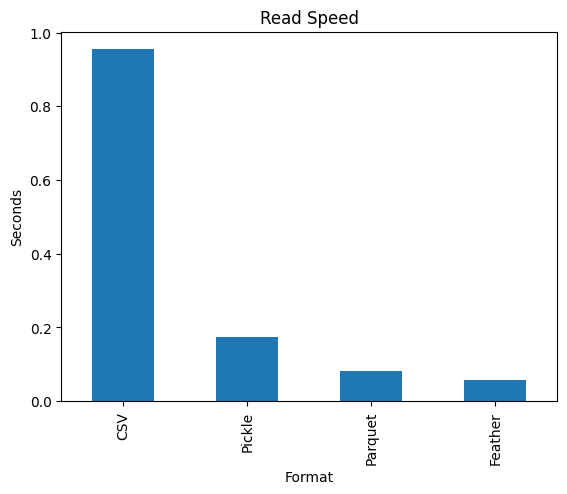

In [36]:
pd.DataFrame(read_data,
    columns=['Format','run time']
            ).set_index('Format')['run time'].plot(
                kind='bar',
                title='Read Speed').set_ylabel("Seconds")

Text(0, 0.5, 'Seconds')

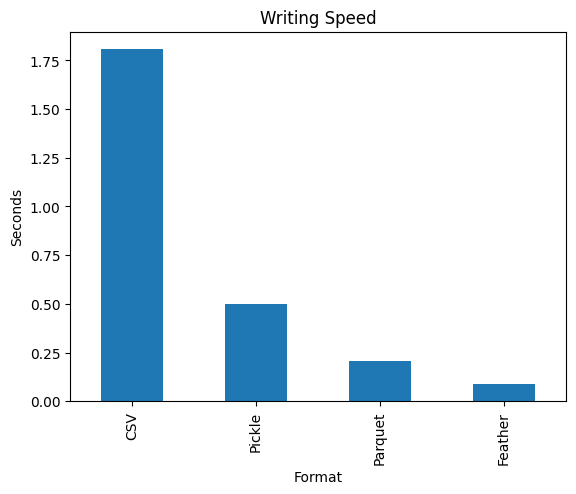

In [37]:
pd.DataFrame(write_data,
    columns=['Format','run time']
            ).set_index('Format')['run time'].plot(
                kind='bar',
                title='Writing Speed').set_ylabel("Seconds")

# TQDM 
Documentation: https://tqdm.github.io

In [38]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [39]:
from tqdm import tqdm
import time

max_val = 1000
some_condition = True

p = tqdm(total=max_val, disable=False)

if some_condition:
    for i in range(max_val):
        time.sleep(0.01)
        p.update(1)
    p.close()

100%|███████████████████████████████████████| 1000/1000 [00:11<00:00, 85.62it/s]


In [40]:
from tqdm import tqdm
import time

class ProgressBar(object):  # Python3+ '(object)' can be omitted
    def __init__(self, max_value, disable=True):
        self.max_value = max_value
        self.disable = disable
        self.p = self.pbar()

    def pbar(self):
        return tqdm(
            total=self.max_value,
            desc='Doing Something: ',
            disable=self.disable
        )

    def update(self, update_value):
        self.p.update(update_value)

    def close(self):
        self.p.close()


max_val = 1000
some_condition = True

p = ProgressBar(max_value=max_val, disable=False)

if some_condition:
    for i in range(max_val):
        time.sleep(0.01)
        p.update(1)
    p.close()

Doing Something: 100%|██████████████████████| 1000/1000 [00:11<00:00, 85.45it/s]


# Split-Apply-Combine
Recomended Lecture: https://www.youtube.com/watch?v=TjuRnguO62E

Short Walkthrough: https://www.youtube.com/watch?v=Acld5O-WUsc